CS401, CA2  
Raphaël BRENA, 25181114, Erasmus  
# **Decision Trees**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# **Task 1: Understanding the data**

# Question A.

The dataset I selected is the **Breast Cancer Wisconsin (Original)** dataset.

Link: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

This dataset contains measurements computed from microscope images of fine-needle aspirates of breast masses. It has **699 samples** and **9 numerical features**. Each feature represents a score between 1 and 10 describing visible cell characteristics.

* Clump Thickness
* Uniformity of Cell Size
* Uniformity of Cell Shape
* Marginal Adhesion
* Single Epithelial Cell Size
* Bare Nuclei
* Bland Chromatin
* Normal Nucleoli
* Mitoses

The target variable is categorical, indicating whether the tumor is **Benign** or **Malignant**.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = [
    "id", "clump_thickness", "uniformity_cell_size", "uniformity_cell_shape",
    "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei",
    "bland_chromatin", "normal_nucleoli", "mitoses", "class"
]

# Load data
df = pd.read_csv(url, names=column_names, na_values='?')

# Data Cleaning
df = df.drop(columns=['id'])
df = df.dropna()

print("Dataset loaded")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print("Target: class (2=Benign, 4=Malignant)")

Dataset loaded
Shape: (683, 10)
Features: ['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
Target: class (2=Benign, 4=Malignant)


# Question B.

**Description:** The goal of the classification task is to **predict whether a breast tumor is Benign (2) or Malignant (4)** based on the nine numerical cytological features extracted from microscopic images.

**Decision Tree:** A Decision Treeis a reasonable model for this dataset because:

* The features are **numerical** and **interpretable**, so the splits made by the decision tree correspond to **understandable rules** (e.g., Uniformity of Cell Shape <= 3.5).
* The dataset is **small** (699 samples, 9 attributes), allowing for **fast training** and **clear tree visualization**.
* The decision boundary is likely nonlinear, and decision trees **handle nonlinear relationships naturally** through hierarchical splits.
* The result is a **human-interpretable model**, which is valuable in medical contexts where explanations matter.
* Decision trees can capture interactions between features **without requiring feature scaling**.

# Question C.

To summarize the dataset, I generated a **correlation heatmap** of all numerical attributes along with the target class. The heatmap reveals several strong patterns:

* **Uniformity of Cell Size** and **Uniformity of Cell Shape** are **extremely highly correlated (≈ 0.91)**. This makes sense biologically, as irregular cell sizes and shapes typically appear together in malignant tumors.
* These two features also show **some of the strongest correlations with the class label (≈ 0.82)**, suggesting they are highly predictive.
* **Bare Nuclei** is also **correlate strongly with the class (≈ 0.82)**.
* **Mitoses** has the **weakest correlations overall**, both with other features and with the class label (≈ 0.42), indicating it **contributes less to prediction** compared to other attributes.

Overall, the heatmap shows that the dataset contains **several clusters of strongly related features**. Many of these features also **correlate strongly with the target variable**, which supports the idea that **simple threshold-based rules**, as used by decision trees, should perform well on this dataset.

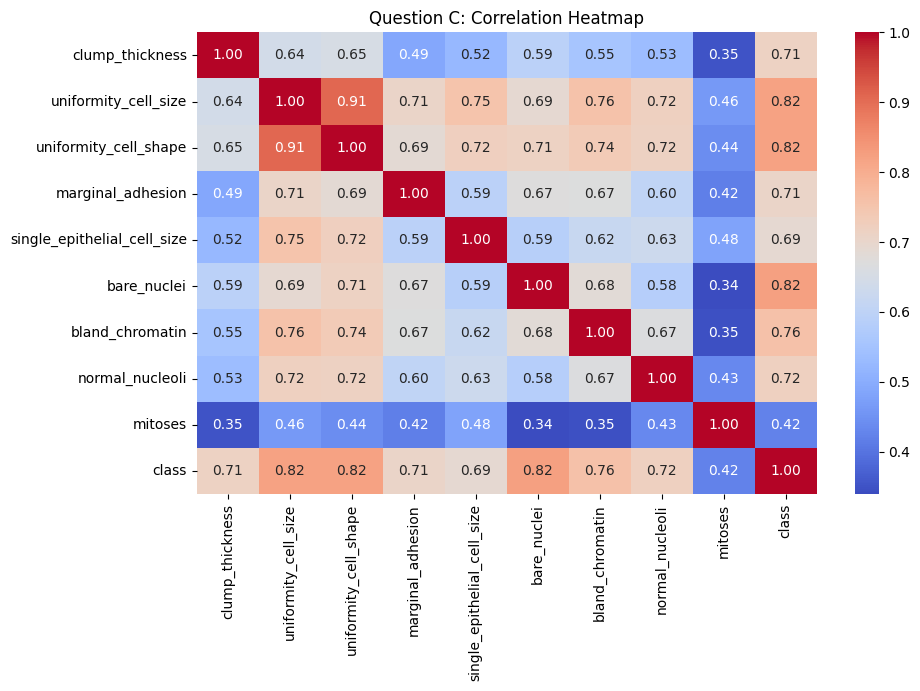

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Question C: Correlation Heatmap")
plt.show()

# **Task 2: Fit a Decision Tree and evaluate performance**

# Question A.

Here is the code to fit the decision tree with the default parameters on 50% of the data.

In [ ]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Question B.

Here is the code to test the decision tree on 50% held out data and generate a classification report.

In [ ]:
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.94      0.94       218
           4       0.90      0.90      0.90       124

    accuracy                           0.93       342
   macro avg       0.92      0.92      0.92       342
weighted avg       0.93      0.93      0.93       342



# Question C.

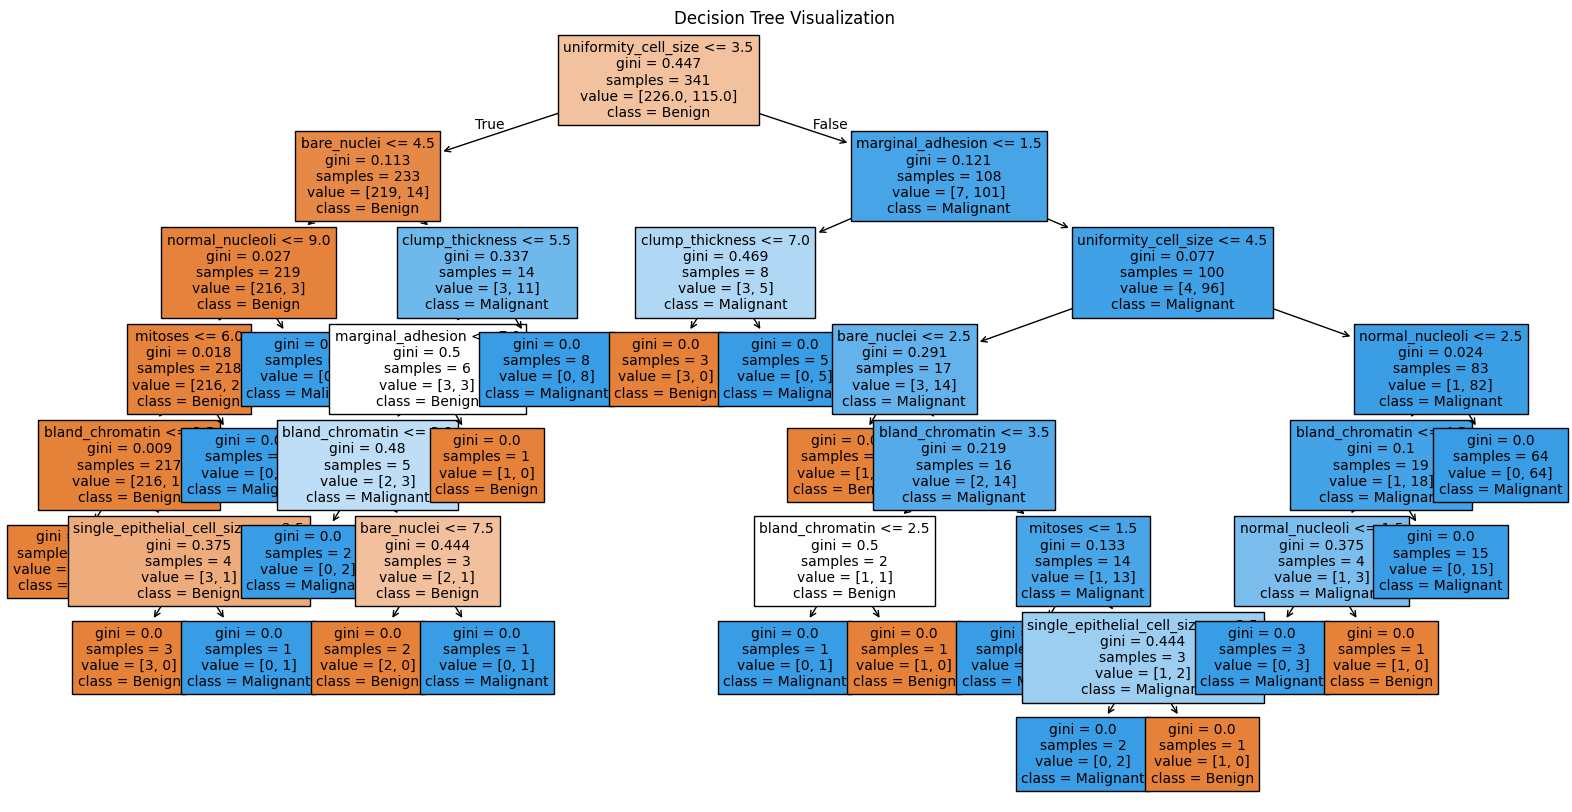

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Several patterns in the structure make sense for this dataset:

* The first split is on **uniformity_cell_size**, which is one of the most predictive features according to the correlation matrix. This is consistent with domain knowledge, as **irregular cell sizes are strongly linked with malignancy**.

* Early splits on features, such as **bare_nuclei**, also match the variables with the highest correlations to the class label.

* The tree heavily separates samples into **Benign (orange)** vs. **Malignant (blue)** regions early on, showing that **the model quickly identifies strong discriminative features**.

* **Many branches end in pure leaves**, meaning the tree confidently classifies those samples.

# Question D.

Yes, the model is consistent with expectations for this dataset:

* It uses the features that are **biologically known to be most indicative of cancer**.

* Most branches follow intuitive increasing thresholds:
  * Lower uniformity, fewer abnormal nuclei → **Benign**
  * Higher uniformity irregularity, higher bare nuclei → **Malignant**

* The tree is able to **separate clean groups** with very low Gini values at the leaves.

Overall, the structure of the model is logical and interpretable.

# Question E.

**Yes, several leaves are very small:**

* Some leaves contain only **1 or 2 samples**.
* It means the model created a **complex rule sequence** (Depth 6 or 7) just to classify one or two specific people.
* This indicates some **overfitting**.

# Question F.

It is on the **borderline**:

* The tree is fairly deep **(Depth 7)**, which reduces interpretability.

* The **upper part of the tree is easy to understand** and follows clear, medically meaningful splits.

* **Deeper branches become harder to follow**, especially where splits occur on features with lower correlation or where nodes contain very few samples.

The full tree is **almost too deep for a real medical context** where we would limit its depth to improve interpretability by a human expert.

# Question G.

I repeated below the process with the **entropy criterion**.

Switching the splitting criterion from **Gini** to **Entropy** produces similar trees:

* They both favors the **exact same features** for the top splits because they are **highly predictive**.

* Some splits **change order or thresholds slightly**.

* The classification reports show only **minor differences** between Gini and Entropy.

Thus, using Entropy in this dataset makes **only a small difference** to the overall classifier.

Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.99      0.96       218
           4       0.98      0.87      0.92       124

    accuracy                           0.95       342
   macro avg       0.96      0.93      0.94       342
weighted avg       0.95      0.95      0.95       342
 

Comparison:
Accuracy (Gini): 0.9269
Accuracy (Entropy): 0.9474



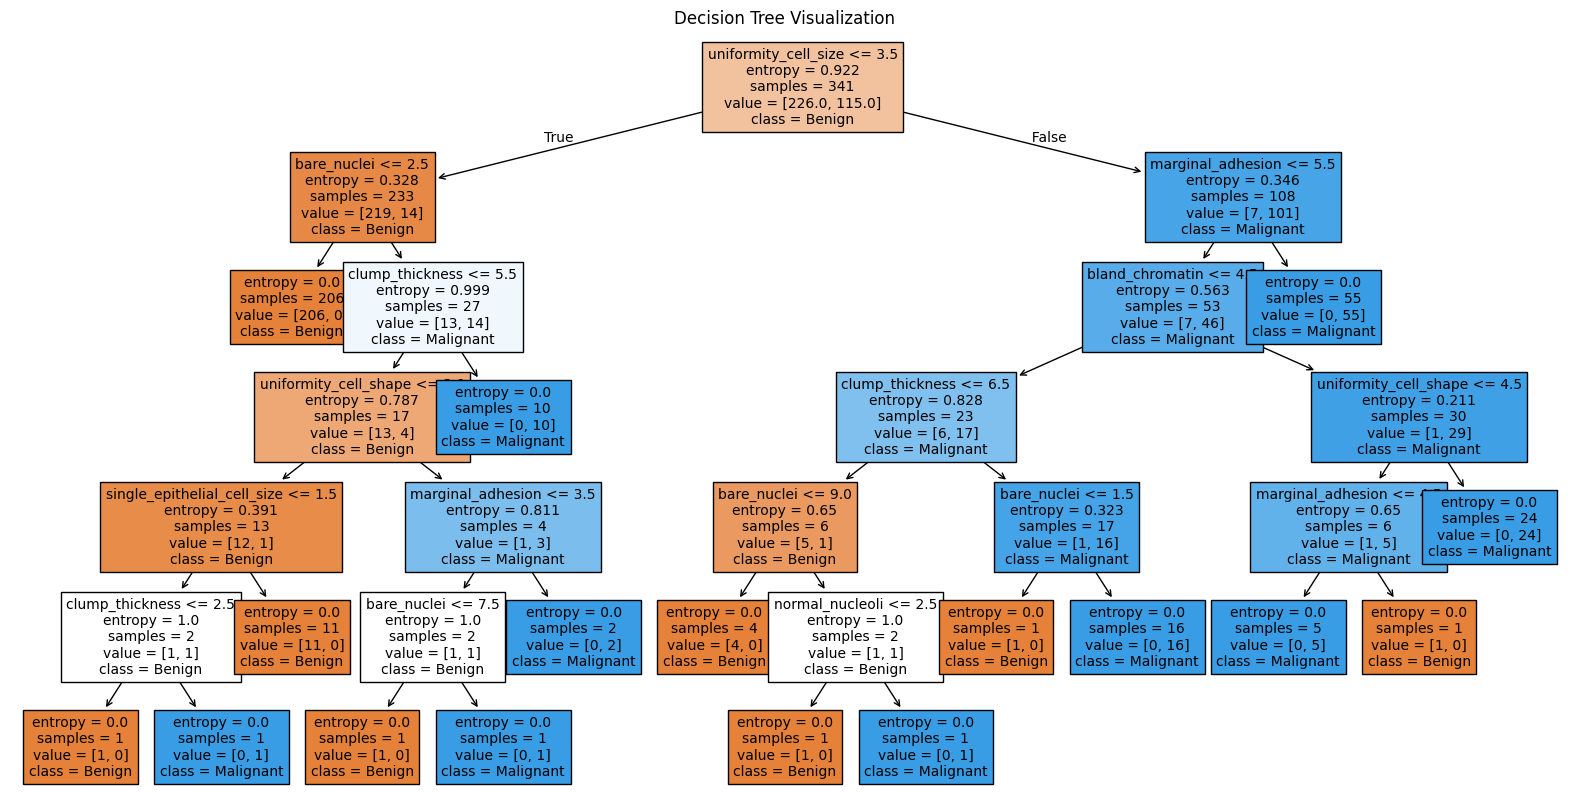

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))

print("Comparison:")
print(f"Accuracy (Gini): {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy (Entropy): {accuracy_score(y_test, y_pred_entropy):.4f}\n")

plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# **Task 3: Experiment with parameters**

# Question A.

I chose to experiment with ***max_depth***, a parameter that limits how deep the tree can grow.

* Depth **strongly affects overfitting** because deeper trees memorize training data, while shallower trees generalize better.

* Depth also **directly impacts interpretability**, which is important for a medical-related dataset.

**Hypothesis**:

* A low max_depth (3) will **underfit**, leading to lower accuracy.

* A moderate max_depth (5) will give the **best balance** between bias and variance.

* A high max_depth (8) will **overfit** the training data, and test performance may decrease.

# Question B.
Based on initial EDA and the depth of the default tree, I chose to test:

* max_depth = **3** → Very shallow tree, **likely underfitting**.

* max_depth = **5** → Medium complexity, **likely the best trade-off**.

* max_depth = **8** → High complexity, closer to the unpruned tree, **risk of overfitting**.

In [ ]:
param_values = [3, 5, 8]
results = []

# Question C. & D.

I retrained the model for each value of the parameter. I then tested and used 4 metrics to describe the performance, and I compiled my results into a
DataFrame

In [ ]:
# Question C.
for val in param_values:
    temp_clf = DecisionTreeClassifier(max_depth=val, random_state=42)
    temp_clf.fit(X_train, y_train)
    preds = temp_clf.predict(X_test)

# Question D.
    res = {
        'max_depth': str(val),
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, pos_label=4),
        'Recall': recall_score(y_test, preds, pos_label=4),
        'F1 Score': f1_score(y_test, preds, pos_label=4)
    }
    results.append(res)

results_df = pd.DataFrame(results)
print("Task 3d: Performance Results DataFrame")
print(results_df)

Y
Y
Y
Task 3d: Performance Results DataFrame
  max_depth  Accuracy  Precision    Recall  F1 Score
0         3  0.935673   0.963636  0.854839  0.905983
1         5  0.935673   0.955357  0.862903  0.906780
2         8  0.926901   0.896000  0.903226  0.899598


# Question E.

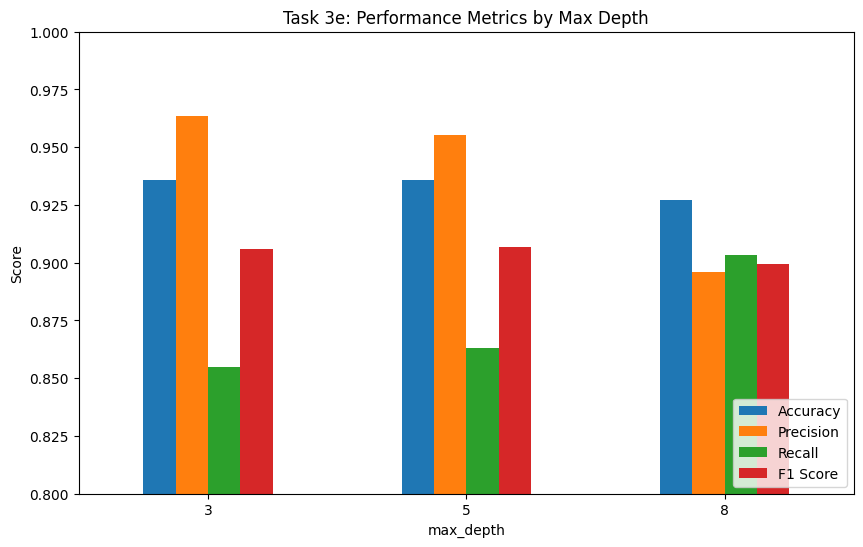

In [ ]:
results_df.set_index('max_depth').plot(kind='bar', figsize=(10, 6))
plt.title("Task 3e: Performance Metrics by Max Depth")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()

**1. Accuracy & F1 Score (General Performance):**

* **Depth 3 and 5** perform almost identically and share the **highest Accuracy** (≈93.6%) and **F1 Score** (≈0.906).

* **Depth 8** actually performs **worse overall**, the accuracy drops to 92.7%.

* This strongly suggests that allowing the tree to grow to depth 8 caused it to **overfit** rather than learn general rules.  

**2. The Precision-Recall Trade-off:**

* **Depth 3 (High Precision)**: This model is very conservative. It has the **highest Precision** (96.4%), meaning if it says a tumor is cancer, it is almost certainly right. However, it has the **lowest Recall** (85.5%), meaning it misses about 15% of the actual cancer cases.

* **Depth 8 (High Recall)**: The deeper model captures more edge cases, boosting Recall to 90.3%. However, it pays a heavy price in Precision, dropping to 89.6%.  

**Conclusion:** Based on these metrics, **Depth 5 is likely the best balanced model**. It matches the **high accuracy** of Depth 3 but offers **slightly better Recall** (finding more cancer) without the massive drop in Precision seen at Depth 8. Our hypothesis that unconstrained trees (Depth 8) overfit is confirmed by the drop in test accuracy.